In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
import os
os.getcwd()

'/home/nycolas/Projetos/football-analysis/discovery/notebooks'

In [3]:
with open('../../stubs/track_stubs.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    data_with_teams = pickle.load(f)

In [8]:
data_with_teams.keys()

# Visualiza o conteúdo das chaves específicas para verificar os dados dos jogadores
print("\nEstrutura dos dados dos jogadores:")
for frame_num, players in enumerate(data_with_teams['players'][:5]):  # Mostra os primeiros 5 frames como exemplo
    print(f"\nFrame {frame_num + 1}:")
    for player_id, player_data in players.items():
        print(f"  Jogador ID {player_id}: {player_data}")
        print("    Team ID:", player_data.get('team'))
        print("    Team Color:", player_data.get('team_color'))



Estrutura dos dados dos jogadores:

Frame 1:
  Jogador ID 1: {'bbox': [563.2994384765625, 175.12335205078125, 586.3995361328125, 235.877197265625], 'team': np.int32(1), 'team_color': array([219.56077975, 221.54144885, 219.27358808])}
    Team ID: 1
    Team Color: [219.56077975 221.54144885 219.27358808]
  Jogador ID 2: {'bbox': [610.6536254882812, 313.2225341796875, 643.3416137695312, 386.0743408203125], 'team': np.int32(1), 'team_color': array([219.56077975, 221.54144885, 219.27358808])}
    Team ID: 1
    Team Color: [219.56077975 221.54144885 219.27358808]
  Jogador ID 3: {'bbox': [718.6451416015625, 436.5992431640625, 746.6871337890625, 525.726806640625], 'team': np.int32(1), 'team_color': array([219.56077975, 221.54144885, 219.27358808])}
    Team ID: 1
    Team Color: [219.56077975 221.54144885 219.27358808]
  Jogador ID 4: {'bbox': [242.00848388671875, 238.15264892578125, 276.992431640625, 310.26434326171875], 'team': np.int32(2), 'team_color': array([66.84066279, 51.64207029,

In [4]:
data.keys()

dict_keys(['players', 'referees', 'ball'])

In [ ]:
players_data = data['players']
players_data

In [ ]:
for player_info in players_data:
    for player_id, details in player_info.items():
        print(f"Player ID: {player_id}")
        if 'bbox' in details:
            bbox = details['bbox']
            print(f"Bounding Box: {bbox}")
        else:
            print(f"bbox não encontrada para esse jogador.")

In [32]:
def get_player_positions(players_data):
    player_positions = []
    
    for player_info in players_data:
        for player_id, details in player_info.items():
            print(f"Player ID: {player_id}")
            if 'bbox' in details:
                bbox = details['bbox']
                # center of bbox
                x_center = (bbox[0] + bbox[2]) / 2
                y_center = (bbox[1] + bbox[3]) / 2
                player_positions.append((x_center, y_center))
                print(f"Bounding Box: {bbox}")
            else:
                print(f"bbox não encontrada para esse jogador.")
    return player_positions

Player ID: 1
Bounding Box: [563.2994384765625, 175.12335205078125, 586.3995361328125, 235.877197265625]
Player ID: 2
Bounding Box: [610.6536254882812, 313.2225341796875, 643.3416137695312, 386.0743408203125]
Player ID: 3
Bounding Box: [718.6451416015625, 436.59918212890625, 746.6871337890625, 525.7267456054688]
Player ID: 4
Bounding Box: [242.00851440429688, 238.15264892578125, 276.9924011230469, 310.26434326171875]
Player ID: 5
Bounding Box: [110.25411987304688, 222.90216064453125, 142.9995574951172, 298.9422607421875]
Player ID: 6
Bounding Box: [1030.176513671875, 335.6659851074219, 1070.900634765625, 408.5937194824219]
Player ID: 7
Bounding Box: [354.12457275390625, 387.37261962890625, 376.52825927734375, 465.4873046875]
Player ID: 8
Bounding Box: [865.4879150390625, 484.1339416503906, 897.3724365234375, 561.4151611328125]
Player ID: 9
Bounding Box: [1209.278076171875, 130.99502563476562, 1242.285400390625, 189.50592041015625]
Player ID: 10
Bounding Box: [841.5211791992188, 328.5878

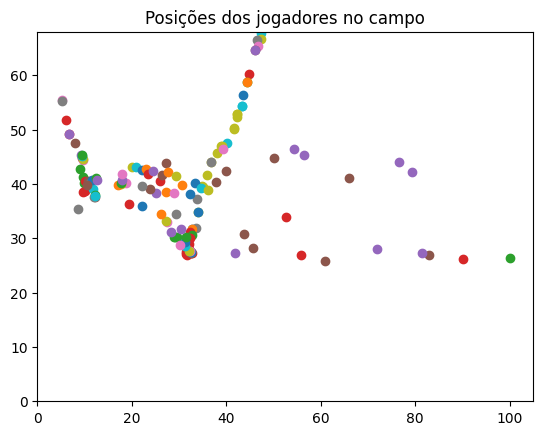

In [34]:
import matplotlib.pyplot as plt

# Coordenadas do campo de futebol (em metros, ajustadas conforme necessário)
field_length = 105  # Comprimento do campo
field_width = 68  # Largura do campo

# Extraindo as posições dos jogadores
players_data = data['players']
player_positions = get_player_positions(players_data)

# Criar o gráfico do campo
fig, ax = plt.subplots()
ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)
ax.set_title("Posições dos jogadores no campo")

# Plotar as posições dos jogadores
for pos in player_positions:
    ax.plot(pos[0], pos[1], 'o')  # ponto representando um jogador

plt.show()


In [25]:
x_center = (bbox[0] + bbox[2]) / 2  # Média entre as coordenadas x da bounding box
y_center = (bbox[1] + bbox[3]) / 2  # Média entre as coordenadas y da bounding box

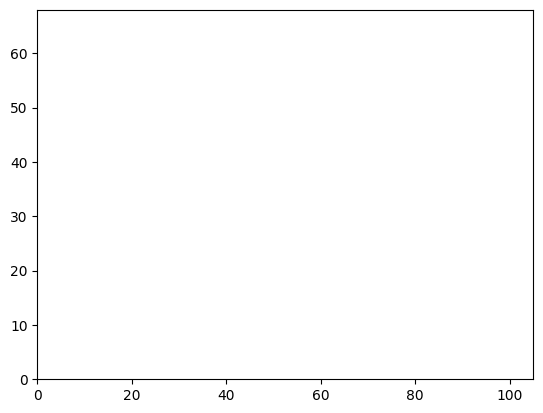

In [31]:
import matplotlib.pyplot as plt

# Coordenadas do campo de futebol (ajustadas conforme necessário)
field_length = 105  # em metros
field_width = 68  # em metros

fig, ax = plt.subplots()
ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)

# Exemplo de lista de posições dos jogadores
player_positions = [(x_center, y_center)]

# Plotar as posições dos jogadores
for pos in player_positions:
    ax.plot(pos[0], pos[1], 'o')  # ponto representando um jogador

plt.show()


In [41]:
# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Função para extrair a posição do jogador com base no bbox
def extract_player_positions(players_data):
    player_positions = []
    for player_info in players_data:
        for player_id, details in player_info.items():
            if 'bbox' in details:
                bbox = details['bbox']
                # Calcular a posição central da bounding box
                x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
                y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
                player_positions.append((x_center, y_center))
    return player_positions

# Obter as posições dos jogadores
player_positions = extract_player_positions(players_data)

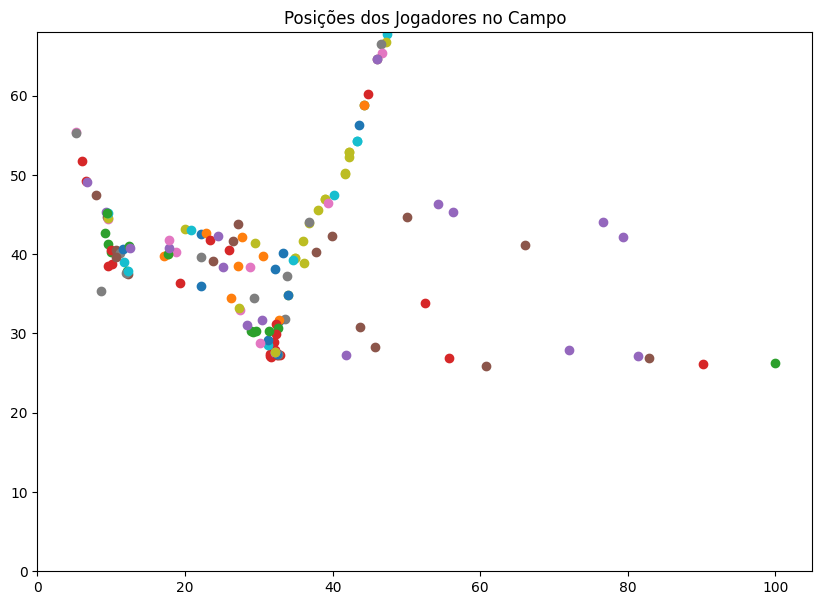

In [42]:

# Obter as posições dos jogadores
player_positions = extract_player_positions(players_data)

# Plotar o campo de futebol e as posições dos jogadores
fig, ax = plt.subplots(figsize=(10, 7))

# Desenhar o campo de futebol
ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)
ax.set_title('Posições dos Jogadores no Campo')

# Plotar as posições dos jogadores
for pos in player_positions:
    ax.plot(pos[0], pos[1], 'o', label='Jogador')

plt.show()

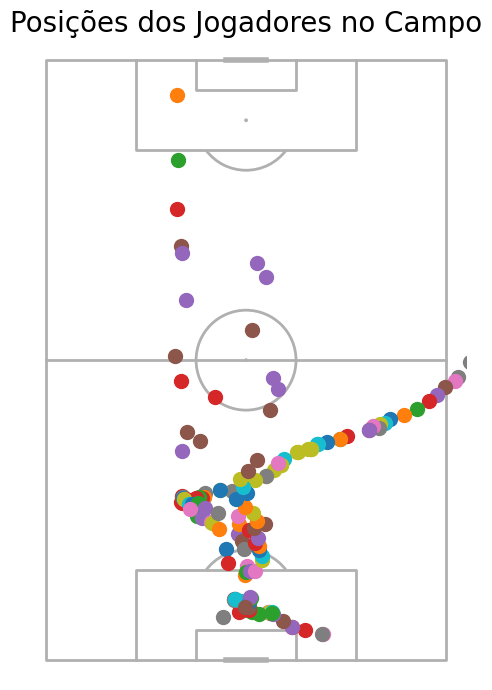

In [44]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

# Configurar o campo utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Você pode definir half=False para campo completo

fig, ax = pitch.draw(figsize=(10, 7))

# Plotar as posições dos jogadores
for player_id, (x, y) in enumerate(player_positions):
    pitch.scatter(x, y, ax=ax, label=f'Player {player_id}', s=100)

# Título e exibição
ax.set_title('Posições dos Jogadores no Campo', fontsize=20)
plt.show()


In [9]:
import pickle
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Função para extrair a posição e o time do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    for player_info in players_data:
        for player_id, details in player_info.items():
            if 'bbox' in details and 'team' in details:
                bbox = details['bbox']
                # Calcular a posição central da bounding box
                x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
                y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
                
                # Adicionar posição com base no `team_id`
                if details['team'] == 1:
                    player_positions_team1.append((x_center, y_center))
                elif details['team'] == 2:
                    player_positions_team2.append((x_center, y_center))
    
    return player_positions_team1, player_positions_team2


In [10]:
# Carregar os dados do arquivo pickle
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)


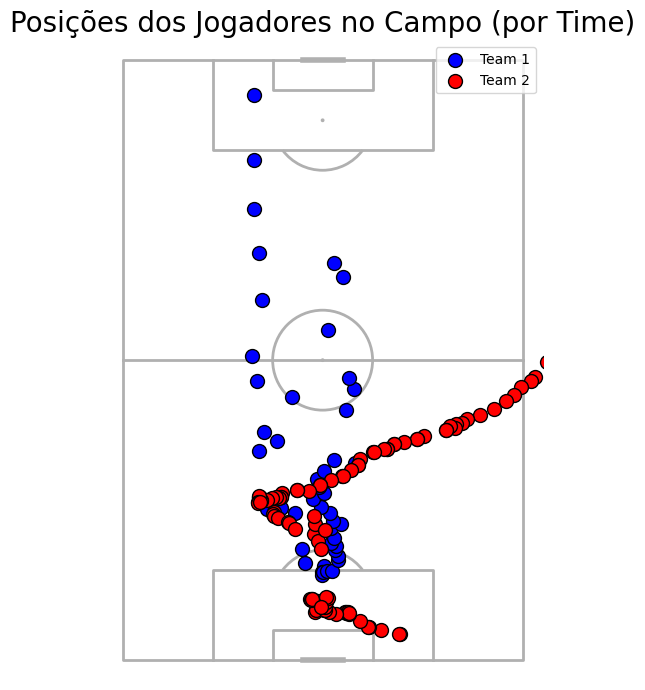

In [11]:

# Extrair as posições dos jogadores e diferenciar por time
player_positions_team1, player_positions_team2 = extract_player_positions_and_teams(tracks['players'])

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

fig, ax = pitch.draw(figsize=(10, 7))

# Plotar as posições dos jogadores, separando por time com cores diferentes
for (x, y) in player_positions_team1:
    pitch.scatter(x, y, ax=ax, color='blue', label='Team 1', s=100, edgecolors='black')

for (x, y) in player_positions_team2:
    pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')

# Título e exibição
ax.set_title('Posições dos Jogadores no Campo (por Time)', fontsize=20)
# Evita repetição de legendas
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.show()


In [ ]:
# Função para extrair a posição e o time do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            # Calcular a posição central da bounding box
            x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
            y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
            
            # Adicionar posição com base no `team_id`
            if details['team'] == 1:
                player_positions_team1.append((x_center, y_center))
            elif details['team'] == 2:
                player_positions_team2.append((x_center, y_center))
    
    return player_positions_team1, player_positions_team2


# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Visualizar gráficos para os 3 primeiros frames
for frame_num in range(3):
    players_data = tracks['players'][frame_num]
    
    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2 = extract_player_positions_and_teams(players_data)
    
    # Criar uma nova figura para cada frame
    fig, ax = pitch.draw(figsize=(10, 7))
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='blue', label='Team 1', s=100, edgecolors='black')
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')
    
    # Título e exibição
    ax.set_title(f'Posições dos Jogadores no Campo - Frame {frame_num + 1}', fontsize=20)
    # Evita repetição de legendas
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Mostrar o gráfico
    plt.show()

In [ ]:
import pickle
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

# Função para extrair a posição e o time do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            # Calcular a posição central da bounding box
            x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
            y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
            
            # Adicionar posição com base no `team_id`
            if details['team'] == 1:
                player_positions_team1.append((x_center, y_center))
            elif details['team'] == 2:
                player_positions_team2.append((x_center, y_center))
    return player_positions_team1, player_positions_team2

# Carregar os dados do arquivo pickle
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Visualizar gráficos para os 3 primeiros frames
for frame_num in range(3):
    print(f"Processando Frame {frame_num + 1}")
    players_data = tracks['players'][frame_num]

    # Verificar se há dados no frame atual
    if not players_data:
        print(f"Nenhum dado de jogador no Frame {frame_num + 1}")
        continue

    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2 = extract_player_positions_and_teams(players_data)
    
    # Verificar se foram encontradas posições para os jogadores
    if not player_positions_team1 and not player_positions_team2:
        print(f"Sem posições válidas de jogadores no Frame {frame_num + 1}")
        continue

    # Criar uma nova figura para cada frame
    fig, ax = pitch.draw(figsize=(10, 7))
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='blue', label='Team 1', s=100, edgecolors='black')
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')
    
    # Título e exibição
    ax.set_title(f'Posições dos Jogadores no Campo - Frame {frame_num + 1}', fontsize=20)
    # Evita repetição de legendas
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Mostrar o gráfico
    plt.show()


In [ ]:
# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Visualizar gráficos para os 3 primeiros frames com depuração
for frame_num in range(3):
    print(f"\nProcessando Frame {frame_num + 1}")
    players_data = tracks['players'][frame_num]

    # Imprimir detalhes dos dados dos jogadores no frame atual
    print(f"Dados dos jogadores no Frame {frame_num + 1}:")
    print(players_data)

    # Verificar se há dados no frame atual
    if not players_data:
        print(f"Nenhum dado de jogador no Frame {frame_num + 1}")
        continue

    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2 = extract_player_positions_and_teams(players_data)
    
    # Verificar se foram encontradas posições para os jogadores
    if not player_positions_team1 and not player_positions_team2:
        print(f"Sem posições válidas de jogadores no Frame {frame_num + 1}")
        continue

    # Criar uma nova figura para cada frame
    fig, ax = pitch.draw(figsize=(10, 7))
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='blue', label='Team 1', s=100, edgecolors='black')
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')
    
    # Título e exibição
    ax.set_title(f'Posições dos Jogadores no Campo - Frame {frame_num + 1}', fontsize=20)
    # Evita repetição de legendas
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Mostrar o gráfico
    plt.show()

In [ ]:
import pickle
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Suponha que as dimensões do vídeo são conhecidas
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            # Calcular a posição central da bounding box
            x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
            y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
            
            # Normalizar para as dimensões do campo
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            
            # Adicionar posição com base no `team_id`
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
    return player_positions_team1, player_positions_team2

# Carregar os dados do arquivo pickle
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Visualizar gráficos para os 3 primeiros frames
for frame_num in range(60):
    print(f"\nProcessando Frame {frame_num + 1}")
    players_data = tracks['players'][frame_num]

    # Imprimir detalhes dos dados dos jogadores no frame atual
    print(f"Dados dos jogadores no Frame {frame_num + 1}:")
    print(players_data)

    # Verificar se há dados no frame atual
    if not players_data:
        print(f"Nenhum dado de jogador no Frame {frame_num + 1}")
        continue

    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2 = extract_player_positions_and_teams(players_data)
    
    # Verificar se foram encontradas posições para os jogadores
    if not player_positions_team1 and not player_positions_team2:
        print(f"Sem posições válidas de jogadores no Frame {frame_num + 1}")
        continue

    # Criar uma nova figura para cada frame
    fig, ax = pitch.draw(figsize=(10, 7))
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='blue', label='Team 1', s=100, edgecolors='black')
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')
    
    # Título e exibição
    ax.set_title(f'Posições dos Jogadores no Campo - Frame {frame_num + 1}', fontsize=20)
    # Evita repetição de legendas
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Mostrar o gráfico
    plt.show()


In [ ]:
import pickle
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Verifique as dimensões do vídeo (ajuste se necessário)
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            # Calcular a posição central da bounding box
            x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
            y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
            
            # Normalizar para as dimensões do campo
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            
            # Adicionar posição com base no `team_id`
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
    return player_positions_team1, player_positions_team2

# Função para extrair e normalizar a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
        y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width
        print(f"Posição normalizada da bola: x={x_normalized:.2f}, y={y_normalized:.2f}")
        return (x_normalized, y_normalized)
    return None

# Carregar os dados do arquivo pickle com o caminho atualizado
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Inicializar uma lista para armazenar o rastro da bola
ball_trace = []

# Visualizar gráficos para os 3 primeiros frames
for frame_num in range(3):
    print(f"\nProcessando Frame {frame_num + 1}")
    
    # Extrair dados do frame atual
    players_data = tracks['players'][frame_num]
    ball_data = tracks['ball'][frame_num]

    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2 = extract_player_positions_and_teams(players_data)
    
    # Extrair a posição da bola
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        ball_trace.append(ball_position)  # Adicionar ao rastro

    # Criar uma nova figura para cada frame
    fig, ax = pitch.draw(figsize=(10, 7))
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='blue', label='Team 1', s=100, edgecolors='black')
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')
    
    # Plotar a posição atual da bola
    if ball_position:
        pitch.scatter(ball_position[0], ball_position[1], ax=ax, color='white', edgecolor='black', s=150, label='Bola')

    # Plotar o rastro da bola como uma série de linhas conectando os pontos consecutivos
    if len(ball_trace) > 1:
        for i in range(len(ball_trace) - 1):
            xstart, ystart = ball_trace[i]
            xend, yend = ball_trace[i + 1]
            pitch.lines(xstart, ystart, xend, yend, ax=ax, color='white', alpha=0.5, lw=2)

    # Título e exibição
    ax.set_title(f'Posições dos Jogadores e da Bola - Frame {frame_num + 1}', fontsize=20)
    
    # Evita repetição de legendas
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Mostrar o gráfico para o frame atual
    plt.show()


## Bola a parte do jogador

In [ ]:
import pickle
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import numpy as np

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Verifique as dimensões do vídeo (ajuste se necessário)
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    player_positions_all = {}  # Adicionar um dicionário para armazenar a posição de todos os jogadores com IDs
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            # Calcular a posição central da bounding box
            x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
            y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
            
            # Normalizar para as dimensões do campo
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            
            # Adicionar posição com base no `team_id`
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
            
            # Adicionar posição ao dicionário de todos os jogadores com ID
            player_positions_all[player_id] = (x_normalized, y_normalized)
    return player_positions_team1, player_positions_team2, player_positions_all

# Função para extrair e normalizar a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
        y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width
        return (x_normalized, y_normalized)
    return None

# Função para encontrar o jogador mais próximo da bola
def find_nearest_player(ball_position, player_positions):
    min_distance = float('inf')
    nearest_player_id = None
    for player_id, player_position in player_positions.items():
        distance = np.sqrt((ball_position[0] - player_position[0])**2 + (ball_position[1] - player_position[1])**2)
        if distance < min_distance:
            min_distance = distance
            nearest_player_id = player_id
    return nearest_player_id, min_distance

# Carregar os dados do arquivo pickle com o caminho atualizado
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Inicializar uma lista para armazenar o rastro da bola
ball_trace = []

# Visualizar gráficos para os 3 primeiros frames
for frame_num in range(60):
    print(f"\nProcessando Frame {frame_num + 1}")
    
    # Extrair dados do frame atual
    players_data = tracks['players'][frame_num]
    ball_data = tracks['ball'][frame_num]

    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2, player_positions_all = extract_player_positions_and_teams(players_data)
    
    # Extrair a posição da bola
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        ball_trace.append(ball_position)  # Adicionar ao rastro

    # Encontrar o jogador mais próximo da bola (posse de bola)
    nearest_player_id, distance_to_ball = find_nearest_player(ball_position, player_positions_all)
    print(f"Jogador mais próximo da bola (ID {nearest_player_id}) está a {distance_to_ball:.2f} metros da bola")

    # Criar uma nova figura para cada frame
    fig, ax = pitch.draw(figsize=(10, 7))
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='blue', label='Team 1', s=100, edgecolors='black')
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')
    
    # Plotar a posição atual da bola
    if ball_position:
        pitch.scatter(ball_position[0], ball_position[1], ax=ax, color='white', edgecolor='black', s=150, label='Bola')
    
    # Destacar o jogador mais próximo da bola
    if nearest_player_id:
        nearest_player_position = player_positions_all[nearest_player_id]
        pitch.scatter(nearest_player_position[0], nearest_player_position[1], ax=ax, color='yellow', s=150, edgecolors='black', label='Posse de bola')

    # Plotar o rastro da bola como uma série de linhas conectando os pontos consecutivos
    if len(ball_trace) > 1:
        for i in range(len(ball_trace) - 1):
            xstart, ystart = ball_trace[i]
            xend, yend = ball_trace[i + 1]
            pitch.lines(xstart, ystart, xend, yend, ax=ax, color='white', alpha=0.5, lw=2)

    # Título e exibição
    ax.set_title(f'Posições dos Jogadores e da Bola - Frame {frame_num + 1}', fontsize=20)
    
    # Evita repetição de legendas
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Mostrar o gráfico para o frame atual
    plt.show()


In [ ]:
# v2

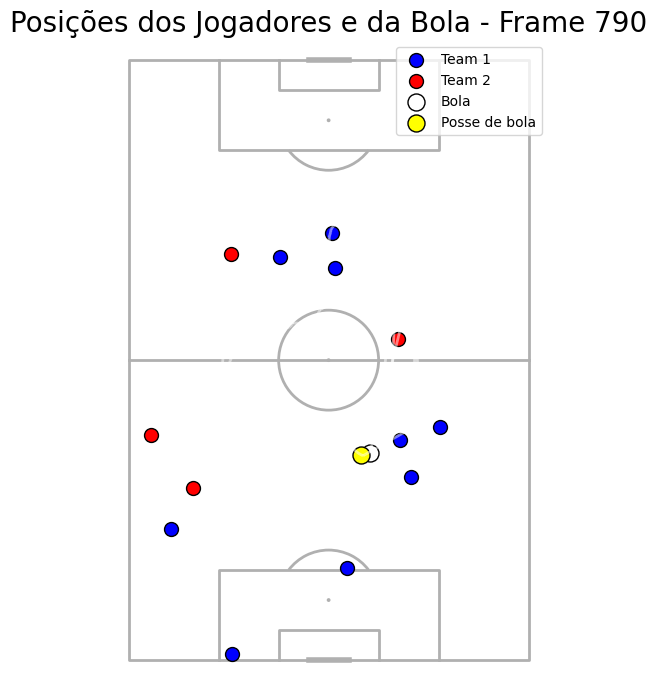

In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Verifique as dimensões do vídeo (ajuste se necessário)
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    player_positions_all = {}  # Adicionar um dicionário para armazenar a posição de todos os jogadores com IDs
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            # Calcular a posição central da bounding box
            x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
            y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
            
            # Normalizar para as dimensões do campo
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            
            # Adicionar posição com base no `team_id`
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
            
            # Adicionar posição ao dicionário de todos os jogadores com ID
            player_positions_all[player_id] = (x_normalized, y_normalized)
    return player_positions_team1, player_positions_team2, player_positions_all

# Função para extrair e normalizar a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
        y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width
        return (x_normalized, y_normalized)
    return None

# Função para encontrar o jogador mais próximo da bola
def find_nearest_player(ball_position, player_positions):
    min_distance = float('inf')
    nearest_player_id = None
    for player_id, player_position in player_positions.items():
        distance = np.sqrt((ball_position[0] - player_position[0])**2 + (ball_position[1] - player_position[1])**2)
        if distance < min_distance:
            min_distance = distance
            nearest_player_id = player_id
    return nearest_player_id, min_distance

# Carregar os dados do arquivo pickle com o caminho atualizado
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Inicializar uma lista para armazenar o rastro da bola
ball_trace = []

# Configuração da figura e do eixo para a animação
fig, ax = pitch.draw(figsize=(10, 7))

# Função de atualização para cada frame da animação
def update(frame_num):
    ax.clear()  # Limpa o campo para o próximo frame
    pitch.draw(ax=ax)  # Redesenha o campo
    
    # Extrair dados do frame atual
    players_data = tracks['players'][frame_num]
    ball_data = tracks['ball'][frame_num]

    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2, player_positions_all = extract_player_positions_and_teams(players_data)
    
    # Extrair a posição da bola
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        ball_trace.append(ball_position)  # Adicionar ao rastro

    # Encontrar o jogador mais próximo da bola (posse de bola)
    nearest_player_id, distance_to_ball = find_nearest_player(ball_position, player_positions_all)
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='blue', label='Team 1', s=100, edgecolors='black')
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')
    
    # Plotar a posição atual da bola
    if ball_position:
        pitch.scatter(ball_position[0], ball_position[1], ax=ax, color='white', edgecolor='black', s=150, label='Bola')
    
    # Destacar o jogador mais próximo da bola
    if nearest_player_id:
        nearest_player_position = player_positions_all[nearest_player_id]
        pitch.scatter(nearest_player_position[0], nearest_player_position[1], ax=ax, color='yellow', s=150, edgecolors='black', label='Posse de bola')

    # Plotar o rastro da bola como uma série de linhas conectando os pontos consecutivos
    if len(ball_trace) > 1:
        for i in range(len(ball_trace) - 1):
            xstart, ystart = ball_trace[i]
            xend, yend = ball_trace[i + 1]
            pitch.lines(xstart, ystart, xend, yend, ax=ax, color='white', alpha=0.5, lw=2)
    
    # Título e exibição do frame
    ax.set_title(f'Posições dos Jogadores e da Bola - Frame {frame_num + 1}', fontsize=20)
    # Evita repetição de legendas
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Número de frames (ajuste conforme o número de frames em tracks)
num_frames = len(tracks['players'])

# Criar a animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)

# Salvar a animação como um vídeo
writer = FFMpegWriter(fps=30, metadata=dict(artist='Me'), bitrate=1800)
ani.save("game_animation3.mp4", writer=writer)

plt.show()


## Voronoi Diagram


Processando Frame 1


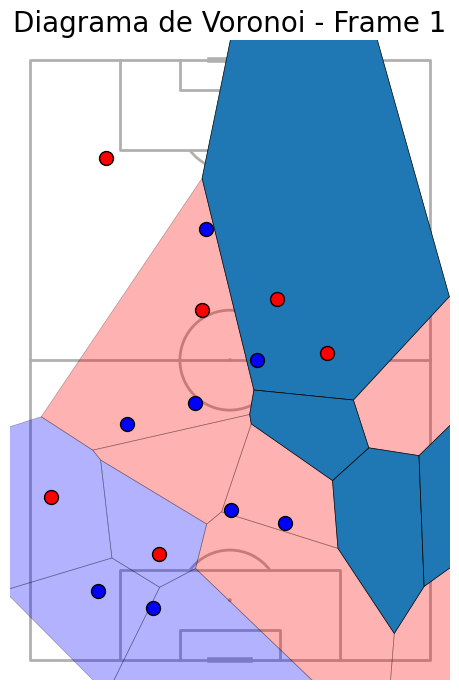


Processando Frame 2


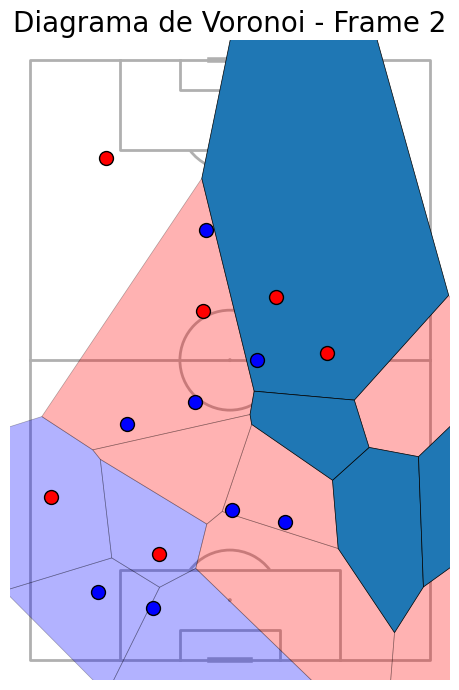


Processando Frame 3


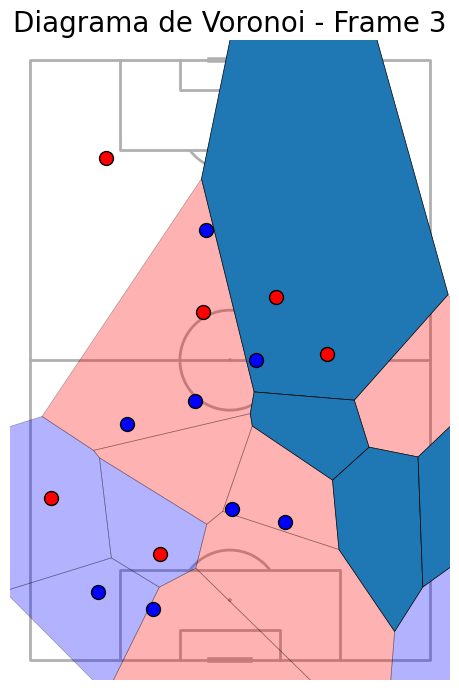

In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Verifique as dimensões do vídeo (ajuste se necessário)
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            # Calcular a posição central da bounding box
            x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
            y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
            
            # Normalizar para as dimensões do campo
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            
            # Adicionar posição com base no `team_id`
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
    
    return player_positions_team1, player_positions_team2

# Função para criar diagrama de Voronoi
def plot_voronoi_diagram(player_positions_team1, player_positions_team2, ax):
    # Combina as posições dos jogadores dos dois times
    all_positions = player_positions_team1 + player_positions_team2
    all_positions = np.array(all_positions)

    # Adicionar pontos fictícios ao redor do campo para restringir o Voronoi
    boundary_points = [
        [-5, -5], [-5, field_width + 5], [field_length + 5, -5], [field_length + 5, field_width + 5]
    ]
    all_positions = np.vstack([all_positions, boundary_points])

    # Calcula o diagrama de Voronoi
    vor = Voronoi(all_positions)

    # Plotar as regiões de Voronoi e colorir por time
    for region_index, region in enumerate(vor.regions):
        if not region or -1 in region:  # ignora regiões fora dos limites
            continue

        polygon = [vor.vertices[i] for i in region]
        poly = Polygon(polygon, edgecolor="black", linewidth=0.5)

        # Colorir com base no time
        if region_index < len(player_positions_team1):
            poly.set_facecolor("blue")
            poly.set_alpha(0.3)
        elif region_index < len(player_positions_team1) + len(player_positions_team2):
            poly.set_facecolor("red")
            poly.set_alpha(0.3)
        ax.add_patch(poly)

# Carregar os dados do arquivo pickle com o caminho atualizado
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Visualizar diagrama de Voronoi para os 3 primeiros frames
for frame_num in range(3):
    print(f"\nProcessando Frame {frame_num + 1}")
    
    # Extrair dados do frame atual
    players_data = tracks['players'][frame_num]

    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2 = extract_player_positions_and_teams(players_data)
    
    # Criar uma nova figura para cada frame
    fig, ax = pitch.draw(figsize=(10, 7))
    
    # Plotar o diagrama de Voronoi
    plot_voronoi_diagram(player_positions_team1, player_positions_team2, ax)
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='blue', label='Team 1', s=100, edgecolors='black')
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')

    # Título e exibição do frame
    ax.set_title(f'Diagrama de Voronoi - Frame {frame_num + 1}', fontsize=20)
    plt.show()


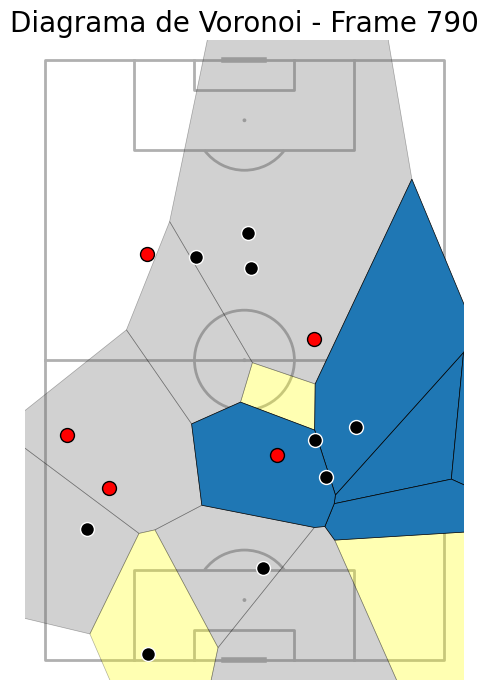

In [21]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from scipy.spatial import Voronoi
from matplotlib.patches import Polygon
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Verifique as dimensões do vídeo (ajuste se necessário)
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    team_colors = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            # Calcular a posição central da bounding box
            x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
            y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
            
            # Normalizar para as dimensões do campo
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            
            # Adicionar posição com base no `team_id` e cores correspondentes
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
                team_colors.append("dimgray")  # cinza escuro para área de team_1
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
                team_colors.append("yellow")  # amarelo para área de team_2
    
    return player_positions_team1, player_positions_team2, team_colors

# Função para criar diagrama de Voronoi com base nas cores dos times
def plot_voronoi_diagram(player_positions_team1, player_positions_team2, team_colors, ax):
    # Combina as posições dos jogadores dos dois times
    all_positions = player_positions_team1 + player_positions_team2
    all_positions = np.array(all_positions)

    # Adicionar pontos fictícios ao redor do campo para restringir o Voronoi
    boundary_points = [
        [-5, -5], [-5, field_width + 5], [field_length + 5, -5], [field_length + 5, field_width + 5]
    ]
    all_positions = np.vstack([all_positions, boundary_points])

    # Calcula o diagrama de Voronoi
    vor = Voronoi(all_positions)

    # Plotar as regiões de Voronoi e colorir por time
    for region_index, region in enumerate(vor.regions):
        if not region or -1 in region:  # ignora regiões fora dos limites
            continue

        polygon = [vor.vertices[i] for i in region]
        poly = Polygon(polygon, edgecolor="black", linewidth=0.5)

        # Colorir com base no time, garantindo que cada área corresponda ao jogador correto
        if region_index < len(team_colors):  # Ignora as regiões fictícias de borda
            poly.set_facecolor(team_colors[region_index])
            poly.set_alpha(0.3)  # Transparência para sobreposição visual mais clara
        ax.add_patch(poly)

# Carregar os dados do arquivo pickle com o caminho atualizado
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Configuração da figura e do eixo para a animação
fig, ax = pitch.draw(figsize=(10, 7))

# Função de atualização para cada frame da animação
def update(frame_num):
    ax.clear()  # Limpa o campo para o próximo frame
    pitch.draw(ax=ax)  # Redesenha o campo
    
    # Extrair dados do frame atual
    players_data = tracks['players'][frame_num]

    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2, team_colors = extract_player_positions_and_teams(players_data)
    
    # Plotar o diagrama de Voronoi
    plot_voronoi_diagram(player_positions_team1, player_positions_team2, team_colors, ax)
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='black', label='Team 1', s=100, edgecolors='white')  # Preto para jogadores do team_1
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')  # Vermelho para jogadores do team_2

    # Título e exibição do frame
    ax.set_title(f'Diagrama de Voronoi - Frame {frame_num + 1}', fontsize=20)

# Número de frames (ajuste conforme o número de frames em tracks)
num_frames = len(tracks['players'])

# Criar a animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)

# Salvar a animação como um vídeo
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("voronoi_animation_15fps.mp4", writer=writer)

plt.show()


## Remover Anomalias

QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 4)

While executing:  | qhull v Qbb Qc Qz
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 2057817185  voronoi  Qbbound-last  Qcoplanar-keep  Qz-infinity-point
  _pre-merge  _zero-centrum  Qinterior-keep  _maxoutside  0


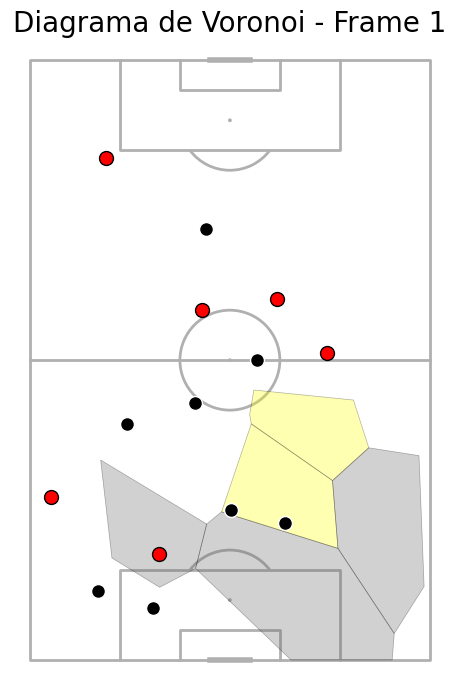

In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from scipy.spatial import Voronoi
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon, MultiPoint
from shapely.ops import unary_union
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Verifique as dimensões do vídeo (ajuste se necessário)
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição do jogador com base no bbox e team_id
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    team_colors = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            # Calcular a posição central da bounding box
            x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
            y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
            
            # Normalizar para as dimensões do campo
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            
            # Adicionar posição com base no `team_id` e cores correspondentes
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
                team_colors.append("dimgray")  # cinza escuro para área de team_1
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
                team_colors.append("yellow")  # amarelo para área de team_2
    
    return player_positions_team1, player_positions_team2, team_colors

# Função para criar diagrama de Voronoi com base nas cores dos times
def plot_voronoi_diagram(player_positions_team1, player_positions_team2, team_colors, ax):
    # Combina as posições dos jogadores dos dois times
    all_positions = player_positions_team1 + player_positions_team2
    all_positions = np.array(all_positions)

    # Calcula o diagrama de Voronoi
    vor = Voronoi(all_positions)

    # Definir os limites do campo como um polígono Shapely
    field_limits = ShapelyPolygon([
        (0, 0), (0, field_width), 
        (field_length, field_width), (field_length, 0)
    ])

    # Plotar as regiões de Voronoi e colorir por time
    for region_index, region in enumerate(vor.regions):
        if not region or -1 in region:  # ignora regiões fora dos limites
            continue

        # Definir o polígono da região de Voronoi
        polygon_points = [vor.vertices[i] for i in region if i >= 0]
        voronoi_polygon = ShapelyPolygon(polygon_points)
        
        # Realizar interseção com os limites do campo
        intersection = voronoi_polygon.intersection(field_limits)

        # Adicionar a área de controle ao campo, com a cor correta
        if intersection.is_empty or region_index >= len(team_colors):
            continue  # Pular áreas fora do campo ou de regiões fictícias

        poly_patch = Polygon(np.array(intersection.exterior.coords), 
                             edgecolor="black", linewidth=0.5, facecolor=team_colors[region_index], alpha=0.3)
        ax.add_patch(poly_patch)

# Carregar os dados do arquivo pickle com o caminho atualizado
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Configuração da figura e do eixo para a animação
fig, ax = pitch.draw(figsize=(10, 7))

# Função de atualização para cada frame da animação
def update(frame_num):
    ax.clear()  # Limpa o campo para o próximo frame
    pitch.draw(ax=ax)  # Redesenha o campo
    
    # Extrair dados do frame atual
    players_data = tracks['players'][frame_num]

    # Extrair as posições dos jogadores e diferenciar por time
    player_positions_team1, player_positions_team2, team_colors = extract_player_positions_and_teams(players_data)
    
    # Plotar o diagrama de Voronoi
    plot_voronoi_diagram(player_positions_team1, player_positions_team2, team_colors, ax)
    
    # Plotar as posições dos jogadores, separando por time com cores diferentes
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax, color='black', label='Team 1', s=100, edgecolors='white')  # Preto para jogadores do team_1
    
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax, color='red', label='Team 2', s=100, edgecolors='black')  # Vermelho para jogadores do team_2

    # Título e exibição do frame
    ax.set_title(f'Diagrama de Voronoi - Frame {frame_num + 1}', fontsize=20)

# Número de frames (ajuste conforme o número de frames em tracks)
num_frames = len(tracks['players'])

# Criar a animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)

# Salvar a animação como um vídeo
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("voronoi_animation_15fps.mp4", writer=writer)

plt.show()


## ball

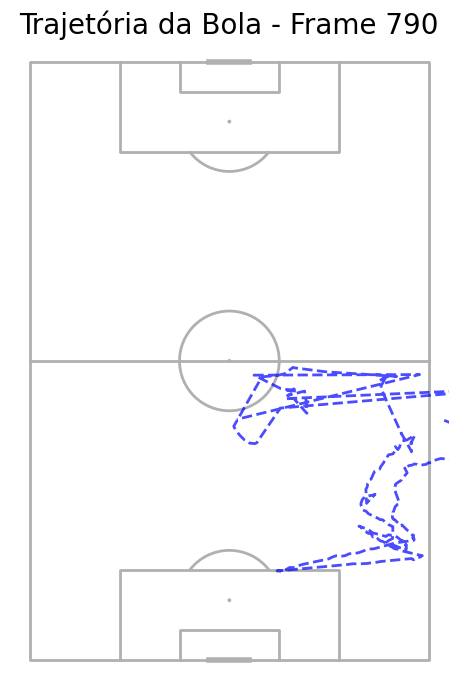

In [27]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Verifique as dimensões do vídeo (ajuste se necessário)
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
        y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width
        return (x_normalized, y_normalized)
    return None

# Carregar os dados do arquivo pickle com o caminho atualizado
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Inicializar listas para armazenar o trajeto da bola
ball_trace_x = []
ball_trace_y = []

# Configuração da figura e do eixo para a animação
fig, ax = pitch.draw(figsize=(10, 7))

# Função de atualização para cada frame da animação
def update(frame_num):
    ax.clear()  # Limpa o campo para o próximo frame
    pitch.draw(ax=ax)  # Redesenha o campo
    
    # Extrair dados do frame atual
    ball_data = tracks['ball'][frame_num]

    # Extrair a posição da bola
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        ball_trace_x.append(ball_position[0])
        ball_trace_y.append(ball_position[1])

    # Plotar o rastro da bola como uma linha tracejada
    ax.plot(ball_trace_x, ball_trace_y, linestyle="--", color="blue", alpha=0.7, linewidth=2, label="Trajetória da Bola")

    # Título e exibição do frame
    ax.set_title(f'Trajetória da Bola - Frame {frame_num + 1}', fontsize=20)

# Número de frames (ajuste conforme o número de frames em tracks)
num_frames = len(tracks['ball'])

# Criar a animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)

# Salvar a animação como um vídeo
writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani.save("ball_trajectory_20fps.mp4", writer=writer)

plt.show()


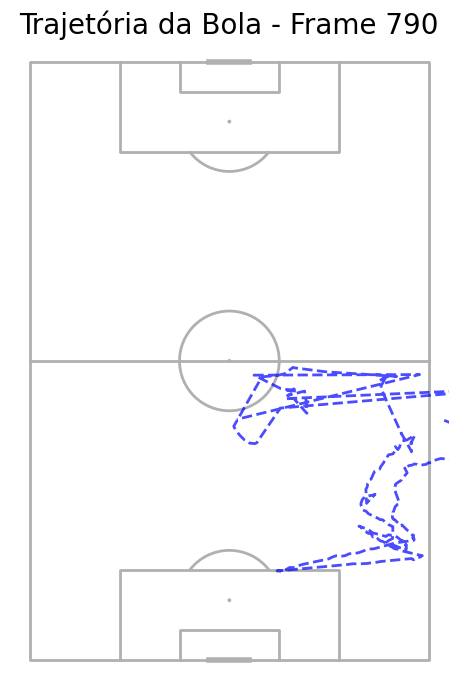

In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Verifique as dimensões do vídeo (ajuste se necessário)
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
        y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width

        # Garantir que a posição da bola está dentro dos limites do campo
        x_normalized = min(max(x_normalized, 0), field_length)
        y_normalized = min(max(y_normalized, 0), field_width)

        return (x_normalized, y_normalized)
    return None

# Carregar os dados do arquivo pickle com o caminho atualizado
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Inicializar listas para armazenar o trajeto da bola
ball_trace_x = []
ball_trace_y = []

# Configuração da figura e do eixo para a animação
fig, ax = pitch.draw(figsize=(10, 7))

# Função de atualização para cada frame da animação
def update(frame_num):
    ax.clear()  # Limpa o campo para o próximo frame
    pitch.draw(ax=ax)  # Redesenha o campo
    
    # Extrair dados do frame atual
    ball_data = tracks['ball'][frame_num]

    # Extrair a posição da bola
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        ball_trace_x.append(ball_position[0])
        ball_trace_y.append(ball_position[1])

    # Plotar o rastro da bola como uma linha tracejada
    ax.plot(ball_trace_x, ball_trace_y, linestyle="--", color="blue", alpha=0.7, linewidth=2, label="Trajetória da Bola")

    # Título e exibição do frame
    ax.set_title(f'Trajetória da Bola - Frame {frame_num + 1}', fontsize=20)

# Número de frames (ajuste conforme o número de frames em tracks)
num_frames = len(tracks['ball'])

# Criar a animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)

# Salvar a animação como um vídeo
writer = FFMpegWriter(fps=25, metadata=dict(artist='Me'), bitrate=1800)
ani.save("ball_trajectory_25fps.mp4", writer=writer)

plt.show()


## Normalização de outra forma

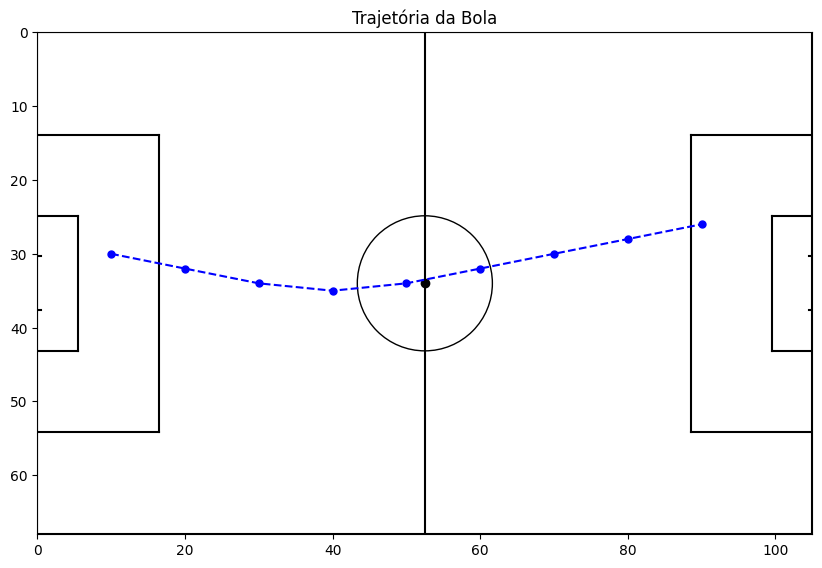

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Definir as dimensões do campo de futebol em metros
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Função para desenhar o campo de futebol usando apenas matplotlib
def draw_field(ax):
    # Desenhar o contorno do campo
    ax.plot([0, 0, field_length, field_length, 0], [0, field_width, field_width, 0, 0], color="black")

    # Linhas centrais
    ax.plot([field_length / 2, field_length / 2], [0, field_width], color="black")
    
    # Área do gol - esquerda
    ax.plot([0, 5.5], [field_width / 2 - 9.16, field_width / 2 - 9.16], color="black")
    ax.plot([0, 5.5], [field_width / 2 + 9.16, field_width / 2 + 9.16], color="black")
    ax.plot([5.5, 5.5], [field_width / 2 - 9.16, field_width / 2 + 9.16], color="black")

    # Área do gol - direita
    ax.plot([field_length, field_length - 5.5], [field_width / 2 - 9.16, field_width / 2 - 9.16], color="black")
    ax.plot([field_length, field_length - 5.5], [field_width / 2 + 9.16, field_width / 2 + 9.16], color="black")
    ax.plot([field_length - 5.5, field_length - 5.5], [field_width / 2 - 9.16, field_width / 2 + 9.16], color="black")
    
    # Grande área - esquerda
    ax.plot([0, 16.5], [field_width / 2 - 20.16, field_width / 2 - 20.16], color="black")
    ax.plot([0, 16.5], [field_width / 2 + 20.16, field_width / 2 + 20.16], color="black")
    ax.plot([16.5, 16.5], [field_width / 2 - 20.16, field_width / 2 + 20.16], color="black")

    # Grande área - direita
    ax.plot([field_length, field_length - 16.5], [field_width / 2 - 20.16, field_width / 2 - 20.16], color="black")
    ax.plot([field_length, field_length - 16.5], [field_width / 2 + 20.16, field_width / 2 + 20.16], color="black")
    ax.plot([field_length - 16.5, field_length - 16.5], [field_width / 2 - 20.16, field_width / 2 + 20.16], color="black")

    # Circulo central
    center_circle = patches.Circle((field_length / 2, field_width / 2), 9.15, color="black", fill=False)
    ax.add_patch(center_circle)
    
    # Ponto central
    ax.plot(field_length / 2, field_width / 2, 'o', color="black")

    # Marcação dos gols
    ax.plot([0, 0.5], [field_width / 2 - 3.66, field_width / 2 - 3.66], color="black")
    ax.plot([0, 0.5], [field_width / 2 + 3.66, field_width / 2 + 3.66], color="black")
    ax.plot([field_length, field_length - 0.5], [field_width / 2 - 3.66, field_width / 2 - 3.66], color="black")
    ax.plot([field_length, field_length - 0.5], [field_width / 2 + 3.66, field_width / 2 + 3.66], color="black")

# Exemplo de coordenadas da trajetória da bola
ball_trajectory_x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
ball_trajectory_y = [30, 32, 34, 35, 34, 32, 30, 28, 26]

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)

# Desenhar o campo de futebol
draw_field(ax)

# Plotar a trajetória da bola
ax.plot(ball_trajectory_x, ball_trajectory_y, linestyle="--", color="blue", marker="o", markersize=5)

# Configurações de exibição
ax.set_title("Trajetória da Bola")
ax.set_aspect('equal', 'box')
plt.gca().invert_yaxis()  # Inverter eixo y para alinhar com orientação padrão do campo
plt.show()


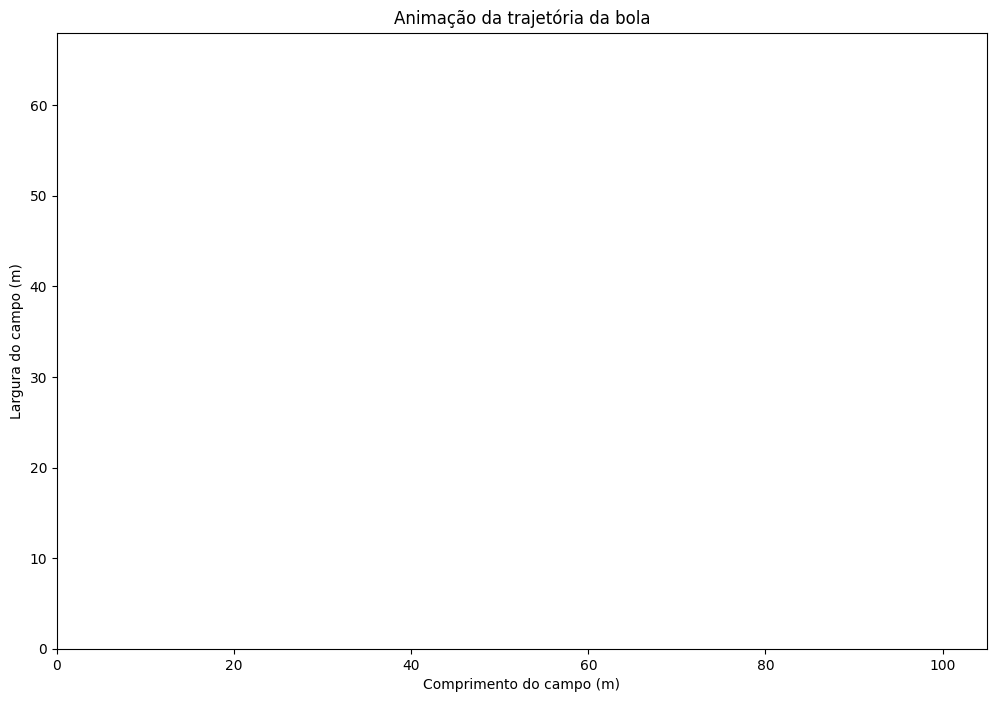

In [43]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle

# Carregar os dados de tracking_data
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracking_data = pickle.load(f)

# Extrair as posições da bola (centro do bbox) a partir de tracking_data['ball']
ball_positions = []
for frame in tracking_data['ball']:  # Acessa cada frame na lista de 'ball'
    if isinstance(frame, dict):  # Verifica se o frame é um dicionário
        for key, value in frame.items():  # Itera sobre os itens no frame
            if 'bbox' in value:  # Confirma que 'bbox' está presente
                bbox = value['bbox']
                x_center = (bbox[0] + bbox[2]) / 2
                y_center = (bbox[1] + bbox[3]) / 2
                ball_positions.append((x_center, y_center))

# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Configurar o gráfico do campo de futebol
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)
ax.set_xlabel("Comprimento do campo (m)")
ax.set_ylabel("Largura do campo (m)")
ax.set_title("Animação da trajetória da bola")

# Trajetória inicial da bola
ball_trajectory, = ax.plot([], [], 'ro', markersize=5)  # 'ro' = bola vermelha

# Função para inicializar a animação
def init():
    ball_trajectory.set_data([], [])
    return ball_trajectory,

# Função para atualizar a posição da bola em cada frame
def update(frame):
    x, y = ball_positions[frame]
    ball_trajectory.set_data(x, y)
    return ball_trajectory,

# Configurar e iniciar a animação
ani = animation.FuncAnimation(fig, update, frames=len(ball_positions),
                              init_func=init, blit=True, interval=50)

# Mostrar a animação
plt.show()


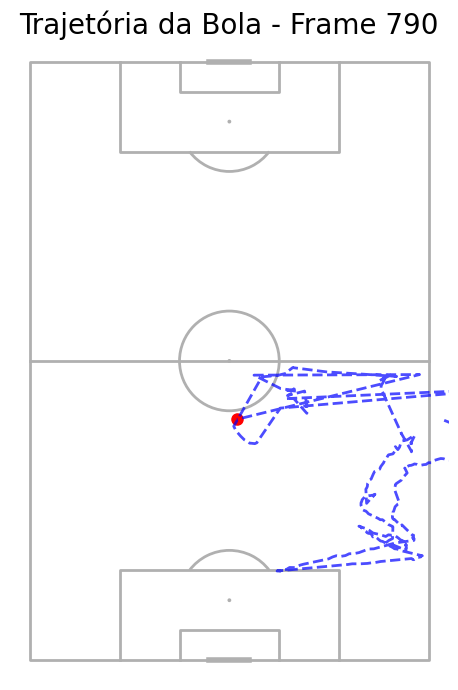

In [55]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Dimensões do vídeo (em pixels)
video_width = 1280  # largura do vídeo em pixels
video_height = 720  # altura do vídeo em pixels

# Função para extrair e normalizar a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
        y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
        # Escalando para o campo considerando a proporção do vídeo
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width

        # Retornar as coordenadas normalizadas da bola
        return (x_normalized, y_normalized)
    return None

# Carregar os dados do arquivo pickle
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar o campo de futebol utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Campo completo

# Inicializar listas para armazenar o trajeto da bola
ball_trace_x = []
ball_trace_y = []

# Configuração da figura e do eixo para a animação
fig, ax = pitch.draw(figsize=(10, 7))

# Função de atualização para cada frame da animação
def update(frame_num):
    ax.clear()  # Limpa o campo para o próximo frame
    pitch.draw(ax=ax)  # Redesenha o campo
    
    # Extrair dados do frame atual
    ball_data = tracks['ball'][frame_num]

    # Extrair a posição da bola
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        # Adiciona a posição ao rastro
        ball_trace_x.append(ball_position[0])
        ball_trace_y.append(ball_position[1])

        # Plotar a bola
        ax.plot(ball_position[0], ball_position[1], 'o', color="red", markersize=8, label="Posição da Bola" if frame_num == 0 else "")

    # Plotar o rastro da bola como uma linha tracejada
    ax.plot(ball_trace_x, ball_trace_y, linestyle="--", color="blue", alpha=0.7, linewidth=2, label="Trajetória da Bola")

    # Título e exibição do frame
    ax.set_title(f'Trajetória da Bola - Frame {frame_num + 1}', fontsize=20)

# Número de frames
num_frames = len(tracks['ball'])

# Criar a animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)

# Salvar a animação como um vídeo
writer = FFMpegWriter(fps=25, metadata=dict(artist='Me'), bitrate=1800)
ani.save("ball_trajectory_25fps.mp4", writer=writer)

plt.show()


In [41]:
# Inspeção das chaves e tipos de tracking_data
print("Chaves principais em tracking_data:", tracking_data.keys())
for key, value in tracking_data.items():
    print(f"Chave: {key}, Tipo do valor: {type(value)}")


Chaves principais em tracking_data: dict_keys(['players', 'referees', 'ball'])
Chave: players, Tipo do valor: <class 'list'>
Chave: referees, Tipo do valor: <class 'list'>
Chave: ball, Tipo do valor: <class 'list'>


# Diagrama de Voronoi + Trajetoria da Bola

Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.


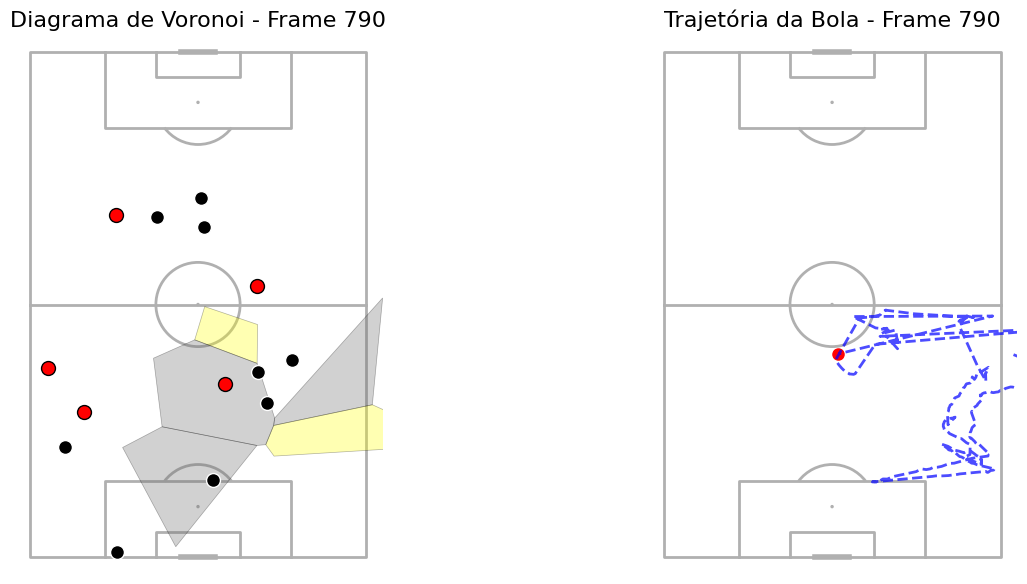

In [65]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from scipy.spatial import Voronoi
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Dimensões do campo e do vídeo
field_length = 105
field_width = 68
video_width = 1280
video_height = 720

# Função para extrair posições e times dos jogadores
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    team_colors = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            x_center = (bbox[0] + bbox[2]) / 2
            y_center = (bbox[1] + bbox[3]) / 2
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
                team_colors.append("dimgray")
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
                team_colors.append("yellow")
    return player_positions_team1, player_positions_team2, team_colors

# Função para plotar o diagrama de Voronoi
def plot_voronoi_diagram(player_positions_team1, player_positions_team2, team_colors, ax):
    all_positions = np.array(player_positions_team1 + player_positions_team2)
    
    # Verifica se há pelo menos 4 pontos para o Voronoi
    if len(all_positions) < 4:
        print("Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.")
        return

    vor = Voronoi(all_positions)
    field_limits = ShapelyPolygon([(0, 0), (0, field_width), (field_length, field_width), (field_length, 0)])
    
    for region_index, region in enumerate(vor.regions):
        if not region or -1 in region:
            continue
        polygon_points = [vor.vertices[i] for i in region if i >= 0]
        voronoi_polygon = ShapelyPolygon(polygon_points)
        intersection = voronoi_polygon.intersection(field_limits)
        if not intersection.is_empty and region_index < len(team_colors):
            poly_patch = Polygon(np.array(intersection.exterior.coords), edgecolor="black", linewidth=0.5, 
                                 facecolor=team_colors[region_index], alpha=0.3)
            ax.add_patch(poly_patch)

# Função para extrair a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2
        y_center = (bbox[1] + bbox[3]) / 2
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width
        return (x_normalized, y_normalized)
    return None

# Carregar dados
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar campo e figuras para animação lado a lado
pitch = VerticalPitch(pitch_type='statsbomb', half=False)
fig, (ax_voronoi, ax_ball) = plt.subplots(1, 2, figsize=(15, 7))
ball_trace_x, ball_trace_y = [], []

# Função de atualização para animação
def update(frame_num):
    ax_voronoi.clear()
    ax_ball.clear()
    pitch.draw(ax=ax_voronoi)
    pitch.draw(ax=ax_ball)
    
    # Diagrama de Voronoi no subplot esquerdo
    players_data = tracks['players'][frame_num]
    player_positions_team1, player_positions_team2, team_colors = extract_player_positions_and_teams(players_data)
    plot_voronoi_diagram(player_positions_team1, player_positions_team2, team_colors, ax_voronoi)
    
    # Plotar posições dos jogadores
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax_voronoi, color='black', s=100, edgecolors='white')
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax_voronoi, color='red', s=100, edgecolors='black')
    ax_voronoi.set_title(f'Diagrama de Voronoi - Frame {frame_num + 1}', fontsize=16)

    # Trajetória da bola no subplot direito
    ball_data = tracks['ball'][frame_num]
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        ball_trace_x.append(ball_position[0])
        ball_trace_y.append(ball_position[1])
        ax_ball.plot(ball_position[0], ball_position[1], 'o', color="red", markersize=8)
    ax_ball.plot(ball_trace_x, ball_trace_y, linestyle="--", color="blue", alpha=0.7, linewidth=2)
    ax_ball.set_title(f'Trajetória da Bola - Frame {frame_num + 1}', fontsize=16)

# Número de frames
num_frames = len(tracks['players'])

# Criar animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("voronoi_ball_tracking_side_by_side.mp4", writer=writer)

plt.show()


# New Voronoi Diagram

Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.


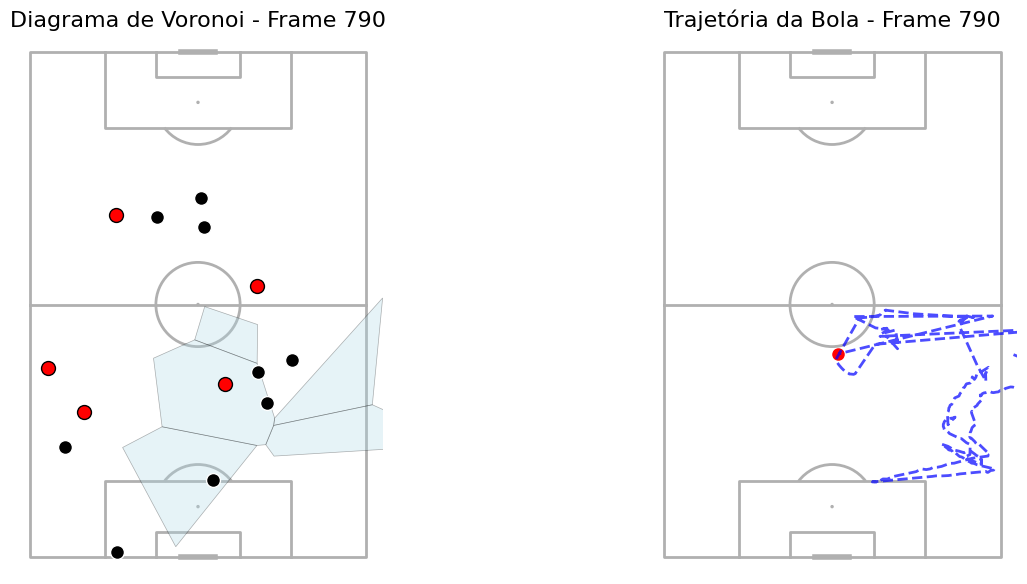

In [66]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from scipy.spatial import Voronoi
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Dimensões do campo e do vídeo
field_length = 105
field_width = 68
video_width = 1280
video_height = 720

# Função para extrair posições e times dos jogadores
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    team_colors = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            x_center = (bbox[0] + bbox[2]) / 2
            y_center = (bbox[1] + bbox[3]) / 2
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
                team_colors.append("dimgray")
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
                team_colors.append("yellow")
    return player_positions_team1, player_positions_team2, team_colors

# Função para plotar o diagrama de Voronoi
def plot_voronoi_diagram(player_positions_team1, player_positions_team2, ax):
    all_positions = np.array(player_positions_team1 + player_positions_team2)
    
    # Verifica se há pelo menos 4 pontos para o Voronoi
    if len(all_positions) < 4:
        print("Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.")
        return

    vor = Voronoi(all_positions)
    field_limits = ShapelyPolygon([(0, 0), (0, field_width), (field_length, field_width), (field_length, 0)])

    # Plotar as regiões de Voronoi
    for region_index, region in enumerate(vor.regions):
        if not region or -1 in region:
            continue
        polygon_points = [vor.vertices[i] for i in region if i >= 0]
        voronoi_polygon = ShapelyPolygon(polygon_points)
        intersection = voronoi_polygon.intersection(field_limits)
        if not intersection.is_empty:
            poly_patch = Polygon(np.array(intersection.exterior.coords), edgecolor="black", linewidth=0.5, 
                                 facecolor="lightblue", alpha=0.3)
            ax.add_patch(poly_patch)

# Função para extrair a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2
        y_center = (bbox[1] + bbox[3]) / 2
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width
        return (x_normalized, y_normalized)
    return None

# Carregar dados
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar campo e figuras para animação lado a lado
pitch = VerticalPitch(pitch_type='statsbomb', half=False)
fig, (ax_voronoi, ax_ball) = plt.subplots(1, 2, figsize=(15, 7))
ball_trace_x, ball_trace_y = [], []

# Função de atualização para animação
def update(frame_num):
    ax_voronoi.clear()
    ax_ball.clear()
    pitch.draw(ax=ax_voronoi)
    pitch.draw(ax=ax_ball)
    
    # Diagrama de Voronoi no subplot esquerdo
    players_data = tracks['players'][frame_num]
    player_positions_team1, player_positions_team2, _ = extract_player_positions_and_teams(players_data)
    plot_voronoi_diagram(player_positions_team1, player_positions_team2, ax_voronoi)
    
    # Plotar posições dos jogadores
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax_voronoi, color='black', s=100, edgecolors='white')
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax_voronoi, color='red', s=100, edgecolors='black')
    ax_voronoi.set_title(f'Diagrama de Voronoi - Frame {frame_num + 1}', fontsize=16)

    # Trajetória da bola no subplot direito
    ball_data = tracks['ball'][frame_num]
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        ball_trace_x.append(ball_position[0])
        ball_trace_y.append(ball_position[1])
        ax_ball.plot(ball_position[0], ball_position[1], 'o', color="red", markersize=8)
    ax_ball.plot(ball_trace_x, ball_trace_y, linestyle="--", color="blue", alpha=0.7, linewidth=2)
    ax_ball.set_title(f'Trajetória da Bola - Frame {frame_num + 1}', fontsize=16)

# Número de frames
num_frames = len(tracks['players'])

# Criar animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("voronoi_ball_tracking_side_by_side.mp4", writer=writer)

plt.show()


Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.


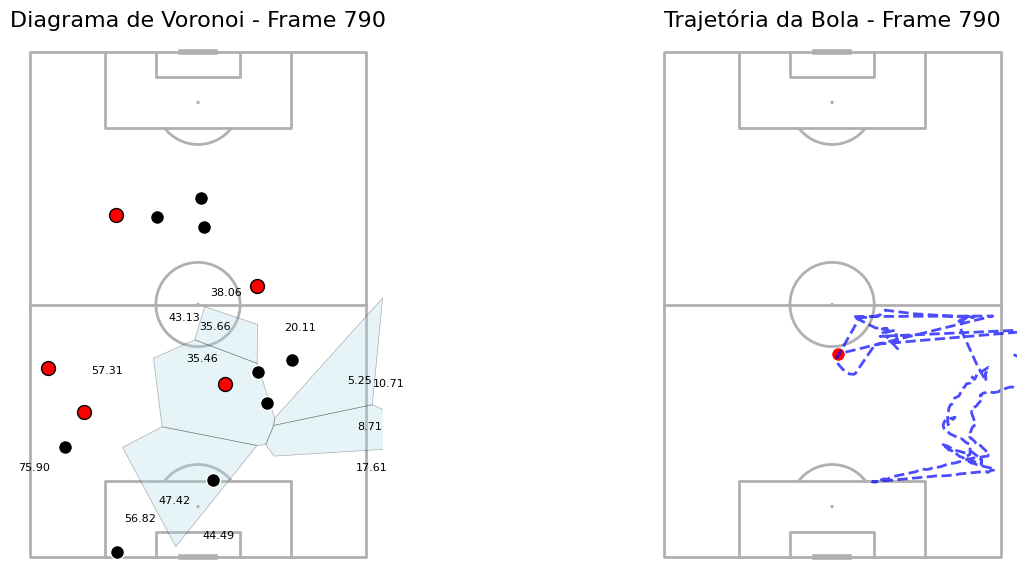

In [67]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from scipy.spatial import Voronoi
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Dimensões do campo e do vídeo
field_length = 105
field_width = 68
video_width = 1280
video_height = 720

# Função para extrair posições e times dos jogadores
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            x_center = (bbox[0] + bbox[2]) / 2
            y_center = (bbox[1] + bbox[3]) / 2
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
    return player_positions_team1, player_positions_team2

# Função para plotar o diagrama de Voronoi e calcular áreas de controle
def plot_voronoi_diagram(player_positions_team1, player_positions_team2, ax):
    all_positions = np.array(player_positions_team1 + player_positions_team2)
    
    # Verifica se há pelo menos 4 pontos para o Voronoi
    if len(all_positions) < 4:
        print("Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.")
        return

    vor = Voronoi(all_positions)
    field_limits = ShapelyPolygon([(0, 0), (0, field_width), (field_length, field_width), (field_length, 0)])

    # Plotar as regiões de Voronoi
    for region_index, region in enumerate(vor.regions):
        if not region or -1 in region:
            continue
        polygon_points = [vor.vertices[i] for i in region if i >= 0]
        voronoi_polygon = ShapelyPolygon(polygon_points)
        intersection = voronoi_polygon.intersection(field_limits)
        if not intersection.is_empty:
            poly_patch = Polygon(np.array(intersection.exterior.coords), edgecolor="black", linewidth=0.5, 
                                 facecolor="lightblue", alpha=0.3)
            ax.add_patch(poly_patch)

    # Cálculo das distâncias da bola
    for idx, (x, y) in enumerate(all_positions):
        distance = np.linalg.norm([x - ball_position[0], y - ball_position[1]])
        ax.text(x, y, f'{distance:.2f}', fontsize=8, ha='center')

# Função para extrair a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2
        y_center = (bbox[1] + bbox[3]) / 2
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width
        return (x_normalized, y_normalized)
    return None

# Carregar dados
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar campo e figuras para animação lado a lado
pitch = VerticalPitch(pitch_type='statsbomb', half=False)
fig, (ax_voronoi, ax_ball) = plt.subplots(1, 2, figsize=(15, 7))
ball_trace_x, ball_trace_y = [], []

# Função de atualização para animação
def update(frame_num):
    ax_voronoi.clear()
    ax_ball.clear()
    pitch.draw(ax=ax_voronoi)
    pitch.draw(ax=ax_ball)
    
    # Diagrama de Voronoi no subplot esquerdo
    players_data = tracks['players'][frame_num]
    player_positions_team1, player_positions_team2 = extract_player_positions_and_teams(players_data)
    plot_voronoi_diagram(player_positions_team1, player_positions_team2, ax_voronoi)
    
    # Plotar posições dos jogadores
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax_voronoi, color='black', s=100, edgecolors='white')
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax_voronoi, color='red', s=100, edgecolors='black')
    ax_voronoi.set_title(f'Diagrama de Voronoi - Frame {frame_num + 1}', fontsize=16)

    # Trajetória da bola no subplot direito
    ball_data = tracks['ball'][frame_num]
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        ball_trace_x.append(ball_position[0])
        ball_trace_y.append(ball_position[1])
        ax_ball.plot(ball_position[0], ball_position[1], 'o', color="red", markersize=8)
    ax_ball.plot(ball_trace_x, ball_trace_y, linestyle="--", color="blue", alpha=0.7, linewidth=2)
    ax_ball.set_title(f'Trajetória da Bola - Frame {frame_num + 1}', fontsize=16)

# Número de frames
num_frames = len(tracks['players'])

# Criar animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)
writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani.save("voronoi_ball_tracking_side_by_side_analysis.mp4", writer=writer)

plt.show()


Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.
Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.


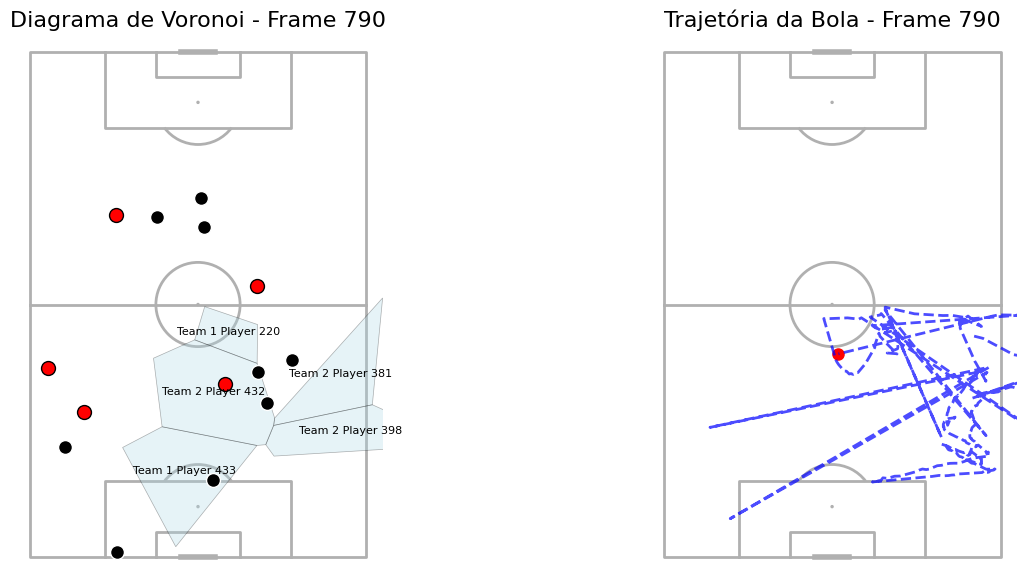

In [72]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from scipy.spatial import Voronoi
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Dimensões do campo e do vídeo
field_length = 105
field_width = 68
video_width = 1280
video_height = 720

# Função para extrair posições e times dos jogadores
def extract_player_positions_and_teams(players_data):
    player_positions_team1 = []
    player_positions_team2 = []
    player_labels = []
    for player_id, details in players_data.items():
        if 'bbox' in details and 'team' in details:
            bbox = details['bbox']
            x_center = (bbox[0] + bbox[2]) / 2
            y_center = (bbox[1] + bbox[3]) / 2
            x_normalized = (x_center / video_width) * field_length
            y_normalized = (y_center / video_height) * field_width
            label = f'Team {details["team"]} Player {player_id}'  # Label para o jogador
            if details['team'] == 1:
                player_positions_team1.append((x_normalized, y_normalized))
                player_labels.append(label)
            elif details['team'] == 2:
                player_positions_team2.append((x_normalized, y_normalized))
                player_labels.append(label)
    return player_positions_team1, player_positions_team2, player_labels

# Função para plotar o diagrama de Voronoi e calcular áreas de controle
def plot_voronoi_diagram(player_positions_team1, player_positions_team2, player_labels, ax):
    all_positions = np.array(player_positions_team1 + player_positions_team2)
    
    # Verifica se há pelo menos 4 pontos para o Voronoi
    if len(all_positions) < 4:
        print("Menos de 4 jogadores, não é possível construir o diagrama de Voronoi.")
        return

    vor = Voronoi(all_positions)
    field_limits = ShapelyPolygon([(0, 0), (0, field_width), (field_length, field_width), (field_length, 0)])

    # Plotar as regiões de Voronoi
    label_index = 0
    for region_index, region in enumerate(vor.regions):
        if not region or -1 in region:
            continue
        
        polygon_points = [vor.vertices[i] for i in region if i >= 0]
        voronoi_polygon = ShapelyPolygon(polygon_points)
        intersection = voronoi_polygon.intersection(field_limits)
        if not intersection.is_empty:
            poly_patch = Polygon(np.array(intersection.exterior.coords), edgecolor="black", linewidth=0.5, 
                                 facecolor="lightblue", alpha=0.3)
            ax.add_patch(poly_patch)

            # Colocar o label do jogador na região se a região corresponder a um jogador
            if label_index < len(player_labels):
                centroid = voronoi_polygon.centroid
                ax.text(centroid.x, centroid.y, player_labels[label_index], fontsize=8, ha='center')
            label_index += 1

# Função para extrair a posição da bola
def extract_ball_position(ball_data):
    if ball_data and 1 in ball_data:
        bbox = ball_data[1]['bbox']
        x_center = (bbox[0] + bbox[2]) / 2
        y_center = (bbox[1] + bbox[3]) / 2
        x_normalized = (x_center / video_width) * field_length
        y_normalized = (y_center / video_height) * field_width
        return (x_normalized, y_normalized)
    return None

# Carregar dados
with open('../../stubs/track_stubs_with_teams.pkl', 'rb') as f:
    tracks = pickle.load(f)

# Configurar campo e figuras para animação lado a lado
pitch = VerticalPitch(pitch_type='statsbomb', half=False)
fig, (ax_voronoi, ax_ball) = plt.subplots(1, 2, figsize=(15, 7))
ball_trace_x, ball_trace_y = [], []

# Função de atualização para animação
def update(frame_num):
    ax_voronoi.clear()
    ax_ball.clear()
    pitch.draw(ax=ax_voronoi)
    pitch.draw(ax=ax_ball)
    
    # Diagrama de Voronoi no subplot esquerdo
    players_data = tracks['players'][frame_num]
    player_positions_team1, player_positions_team2, player_labels = extract_player_positions_and_teams(players_data)
    plot_voronoi_diagram(player_positions_team1, player_positions_team2, player_labels, ax_voronoi)
    
    # Plotar posições dos jogadores
    for (x, y) in player_positions_team1:
        pitch.scatter(x, y, ax=ax_voronoi, color='black', s=100, edgecolors='white')
    for (x, y) in player_positions_team2:
        pitch.scatter(x, y, ax=ax_voronoi, color='red', s=100, edgecolors='black')
    ax_voronoi.set_title(f'Diagrama de Voronoi - Frame {frame_num + 1}', fontsize=16)

    # Trajetória da bola no subplot direito
    ball_data = tracks['ball'][frame_num]
    ball_position = extract_ball_position(ball_data)
    if ball_position:
        ball_trace_x.append(ball_position[0])
        ball_trace_y.append(ball_position[1])
        ax_ball.plot(ball_position[0], ball_position[1], 'o', color="red", markersize=8)
    ax_ball.plot(ball_trace_x, ball_trace_y, linestyle="--", color="blue", alpha=0.7, linewidth=2)
    ax_ball.set_title(f'Trajetória da Bola - Frame {frame_num + 1}', fontsize=16)

# Número de frames
num_frames = len(tracks['players'])

# Criar animação
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("voronoi_ball_tracking_labels_side_by_side.mp4", writer=writer)

plt.show()
